# K-means
### Carlos Marcelo Barrera Nolasco
### 101893

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

In [3]:
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 8.0)

### Ejercicio: analizar las ventajas de usar un modelo de clustering antes de uno de clasificación

#### Leyendo los datos (Data set abalone)

In [5]:
nombres = ['Sex',
 'Length',
 'Diameter',
 'Height',
 'Whole_weight',
 'Shucked_weight',
 'Viscera_weight',
 'Shell_weight',
 'Rings']

In [6]:
abalone = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data', names=nombres)

In [7]:
abalone.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


#### Preprocesamiento de los datos

In [8]:
X = abalone.iloc[:,1:]

In [9]:
y = abalone.iloc[:,0:1]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=101893)

In [11]:
scaler = StandardScaler()

In [12]:
X_train = scaler.fit_transform(X_train)

In [13]:
X_test = scaler.transform(X_test)

In [14]:
y_train = np.array(y_train)

In [15]:
y_test = np.array(y_test)

### Random Forest antes de clustering

In [16]:
forest = RandomForestClassifier(max_features="auto", n_estimators=100, random_state=101893)

In [17]:
forest.fit(X_train, y_train.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=101893, verbose=0,
            warm_start=False)

In [18]:
forest_predict = forest.predict(X_test)

### Evaluación del desempeño

#### Accuracy

In [19]:
accuracy_score(y_test, forest_predict)

0.54146730462519932

#### Matriz de confusión

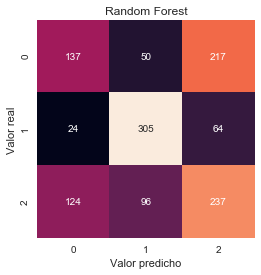

In [20]:
plt.rcParams['figure.figsize'] = (4.0, 4.0)
matriz_conf_forest = confusion_matrix(y_test, forest_predict)
sns.heatmap(matriz_conf_forest, square = True, annot = True, cbar = False, fmt='g')
plt.xlabel('Valor predicho')
plt.ylabel('Valor real')
plt.title('Random Forest')
plt.show()

#### Classsification Report

In [21]:
print(classification_report(y_test, forest_predict))

             precision    recall  f1-score   support

          F       0.48      0.34      0.40       404
          I       0.68      0.78      0.72       393
          M       0.46      0.52      0.49       457

avg / total       0.53      0.54      0.53      1254



### Aplicando K-means

In [22]:
kmeans = KMeans(n_clusters=3, random_state=101893)

In [23]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=101893, tol=0.0001, verbose=0)

In [24]:
abalone["cluster"] = kmeans.predict(X)

In [25]:
abalone.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,cluster
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,2
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,1
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,1


#### Separamos el dataset según el cluster

In [26]:
abalone_c_0 = abalone[abalone["cluster"]==0]
abalone_c_1 = abalone[abalone["cluster"]==1]
abalone_c_2 = abalone[abalone["cluster"]==2]

#### Preprocesamiento

In [27]:
X_c_0 = abalone_c_0.iloc[:,1:9]
y_c_0 = abalone_c_0.iloc[:,0:1]
X_c_1 = abalone_c_1.iloc[:,1:9]
y_c_1 = abalone_c_1.iloc[:,0:1]
X_c_2 = abalone_c_2.iloc[:,1:9]
y_c_2 = abalone_c_2.iloc[:,0:1]

In [28]:
X_c_0_train, X_c_0_test, y_c_0_train, y_c_0_test = train_test_split(X_c_0, y_c_0, train_size=0.7, random_state=101893)
X_c_1_train, X_c_1_test, y_c_1_train, y_c_1_test = train_test_split(X_c_1, y_c_1, train_size=0.7, random_state=101893)
X_c_2_train, X_c_2_test, y_c_2_train, y_c_2_test = train_test_split(X_c_2, y_c_2, train_size=0.7, random_state=101893)

In [29]:
scaler_c_0 = StandardScaler()
scaler_c_1 = StandardScaler()
scaler_c_2 = StandardScaler()

In [30]:
X_c_0_train = scaler_c_0.fit_transform(X_c_0_train)
X_c_0_test = scaler_c_0.transform(X_c_0_test)
y_c_0_train = np.array(y_c_0_train)
y_c_0_test = np.array(y_c_0_test)

X_c_1_train = scaler_c_1.fit_transform(X_c_1_train)
X_c_1_test = scaler_c_1.transform(X_c_1_test)
y_c_1_train = np.array(y_c_1_train)
y_c_1_test = np.array(y_c_1_test)

X_c_2_train = scaler_c_2.fit_transform(X_c_2_train)
X_c_2_test = scaler_c_2.transform(X_c_2_test)
y_c_2_train = np.array(y_c_2_train)
y_c_2_test = np.array(y_c_2_test)

#### Random forest nuevamente

In [31]:
forest_c_0 = RandomForestClassifier(max_features="auto", n_estimators=100, random_state=101893)
forest_c_1 = RandomForestClassifier(max_features="auto", n_estimators=100, random_state=101893)
forest_c_2 = RandomForestClassifier(max_features="auto", n_estimators=100, random_state=101893)

In [32]:
forest_c_0.fit(X_c_0_train, y_c_0_train.ravel())
forest_c_1.fit(X_c_1_train, y_c_1_train.ravel())
forest_c_2.fit(X_c_2_train, y_c_2_train.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=101893, verbose=0,
            warm_start=False)

In [33]:
forest_c_0_predict = forest_c_0.predict(X_c_0_test)
forest_c_1_predict = forest_c_1.predict(X_c_1_test)
forest_c_2_predict = forest_c_2.predict(X_c_2_test)

In [34]:
test_full = np.concatenate((y_c_0_test, y_c_1_test, y_c_2_test), axis=0)
pred_full = np.concatenate((forest_c_0_predict, forest_c_1_predict, forest_c_2_predict), axis=0)

#### Accuracy

In [35]:
accuracy_score(test_full, pred_full)

0.5574162679425837

#### Matriz de Confusión

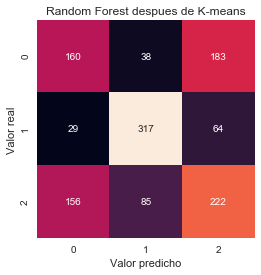

In [36]:
plt.close()
plt.rcParams['figure.figsize'] = (4.0, 4.0)
matriz_conf_forest_2 = confusion_matrix(test_full, pred_full)
sns.heatmap(matriz_conf_forest_2, square = True, annot = True, cbar = False, fmt='g')
plt.xlabel('Valor predicho')
plt.ylabel('Valor real')
plt.title('Random Forest despues de K-means')
plt.show()

#### Classification Report

In [37]:
print(classification_report(test_full, pred_full))

             precision    recall  f1-score   support

          F       0.46      0.42      0.44       381
          I       0.72      0.77      0.75       410
          M       0.47      0.48      0.48       463

avg / total       0.55      0.56      0.55      1254



### Conclusiones

Podemos observar que la accuracy general mejora un poco después del empleo del algoritmo de clustering pasando de 0.541467 a 0.557416.

Por otra parte si comparamos los reportes de clasificación podemos ver que la media de la precisión, recall y f1-score aumentaron de 0.53 a 0.55, de 0.54 a 0.56 y de 0.53 a 0.55 respectivamente. 

La precisión por clase disminuyó para M mientras que aumentó para F e I; el recall aumentó para F y M y disminuyó para I; finalmente el f1-score aumentó para F e I y disminuyó para M.

En general podemos concluir que para esta combinación de datos (abalone) y modelo de clasificación (random forest con 100 árboles) el uso previo del algoritmo de K-means mejoró ligeramente su desempeño.